In [1]:
import random
import copy
import logging
import sys
import glob

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_220725_snr_synapse'

data_script = 'batch_220725_snr_synapse'
db_path = '/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_grcs = 2541
n_mfs = 771
n_trials = 60
# n_trials = 80
num_patterns = 8
pattern_size = 30.0
default_synapse_pct = 10.0

pattern_type = 'binary'
try:
    db = db
except:
    db = {}

def load_db(model_name, path):
    db[model_name] = []
    print(model_name)
    print(path)
    files = glob.glob(f'{path}/*.gz')
    print(len(files))
    for f in files:
        db[model_name].append(compress_pickle.load(f))

for model in [
        'local_random_expanded2_1.2_0_0',
        'local_random_expanded2_1.2_0_1',
        'local_random_expanded2_1.2_1_0',
        'local_random_expanded2_1.2_1_1',
             ]:
    model_name = f'{model}'
    path = (db_path + \
            f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
            f'{num_patterns}_size_{pattern_size}_'
            f'0.3')
    load_db(model_name, path)

print("DONE")


local_random_expanded2_1.2_0_0
/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/batch_220725_snr_synapse/batch_220725_snr_synapse_local_random_expanded2_1.2_0_0_binary_2541_771_8_size_30.0_0.3
501
local_random_expanded2_1.2_0_1
/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/batch_220725_snr_synapse/batch_220725_snr_synapse_local_random_expanded2_1.2_0_1_binary_2541_771_8_size_30.0_0.3
500
local_random_expanded2_1.2_1_0
/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/batch_220725_snr_synapse/batch_220725_snr_synapse_local_random_expanded2_1.2_1_0_binary_2541_771_8_size_30.0_0.3
500
local_random_expanded2_1.2_1_1
/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/batch_220725_snr_synapse/batch_220725_snr_synapse_local_random_expanded2_1.2_1_1_binary_2541_771_8_size_30.0_0.3
500
DONE

In [2]:
default_synapse_pct = 20

In [3]:
def model_names(name):
    if '_0_0' in name:
        return 'Highshare_0_clumpy_0'
    if '_0_1' in name:
        return 'Highshare_0_clumpy_1'
    if '_1_0' in name:
        return 'Highshare_1_clumpy_0'
    if '_1_1' in name:
        return 'Highshare_1_clumpy_1'

In [4]:

averages_ = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

for model in db:
    for ress in db[model]:
        ress_tries = ress
        for ress in ress_tries:
            for noise, res_ in ress.items():
                for synapse_pct, res in res_.items():
                    for k in res:
                        averages_[k][model][noise][synapse_pct].append(res[k])

# averages = defaultdict(lambda: defaultdict(dict))
averages = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
for k, a0 in averages_.items():
    for model, a1 in a0.items():
        for noise, a2 in a1.items():
            for synapse_pct, a3 in a2.items():
                averages[k][model][noise][synapse_pct] = sum(a3)/len(a3)

low share vs high share when clumpy (01 vs 11)
Height: 5.1, Aspect: 1.0784313725490198


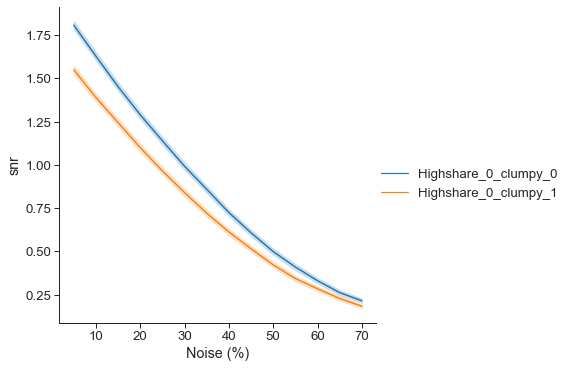

Height: 5.1, Aspect: 1.0784313725490198


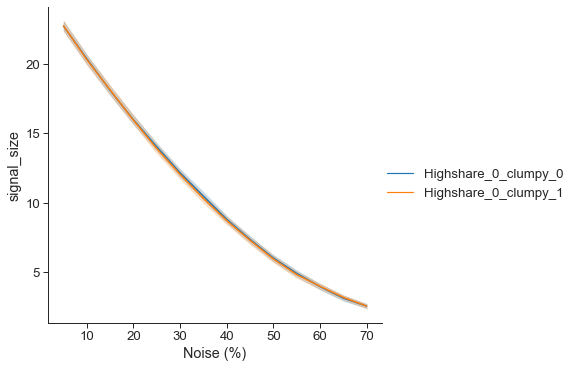

Height: 5.1, Aspect: 1.0784313725490198


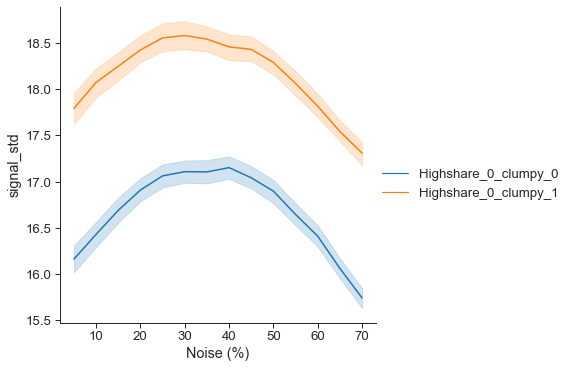

Height: 5.1, Aspect: 1.0784313725490198


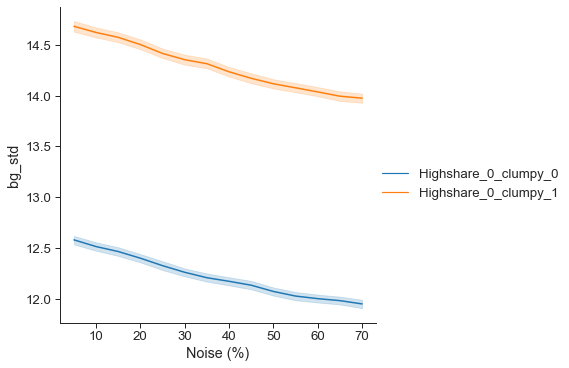

Clumpiness leads to less SNR
And higher signal stdev (but also for bg stdev), signal size looks about the same


In [5]:

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_0_0',
        'local_random_expanded2_1.2_0_1',
#         'local_random_expanded2_1.2_1_0',
#         'local_random_expanded2_1.2_1_1',
        ]:
    
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        for noise in ress:
            if noise < 5 or noise > 70:
                continue
            res = ress[noise]
            res = res[default_synapse_pct]
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_names(model_name),
                noise=noise,
                snr=res['snr'],
#                 snr_norm=res['snr']/avg_snr[noise],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=12)
    
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
    #     palette=palette,
        linewidth=1.5,
    #     width=3.5, height=3.1,
        width=5.5, height=5.1,
    #     ylim=[.925, 1.05],
    #     ylim=[0, None],
        y_axis_label=metric,
        x_axis_label='Noise (%)',
    #     save_filename=f'{script_n}_norm.svg',
        show=True,
    #     custom_legend_fn=custom_legend_fn,
        )

print("low share vs high share when clumpy (01 vs 11)")
plot('snr')
# print("snr less")
plot('signal_size')
# print("signal_size less")
plot('signal_std')
# print("signal_std statistically same, slightly higher")
plot('bg_std')
# print("bg_std statistically same, slightly lower!!!")

print("Clumpiness leads to less SNR")
print("And higher signal stdev (but also for bg stdev), signal size looks about the same")

low share vs high share when clumpy (01 vs 11)
Height: 5.1, Aspect: 1.0784313725490198


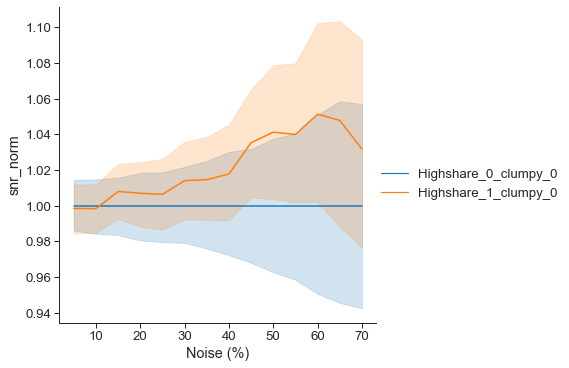

snr less
Height: 5.1, Aspect: 1.0784313725490198


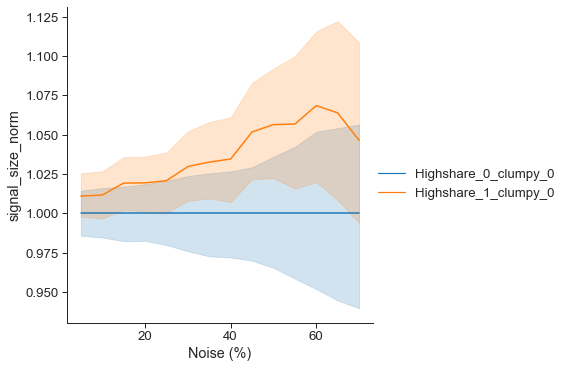

signal_size less
Height: 5.1, Aspect: 1.0784313725490198


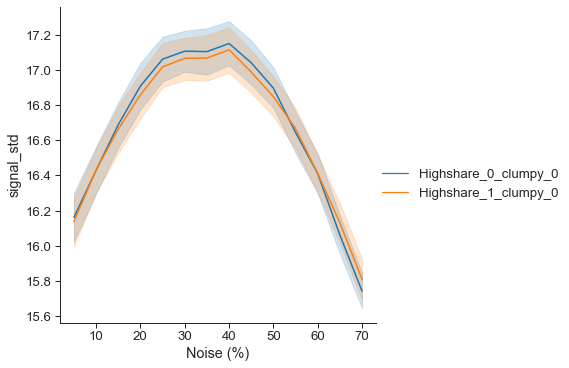

signal_std statistically same, slightly higher
Height: 5.1, Aspect: 1.0784313725490198


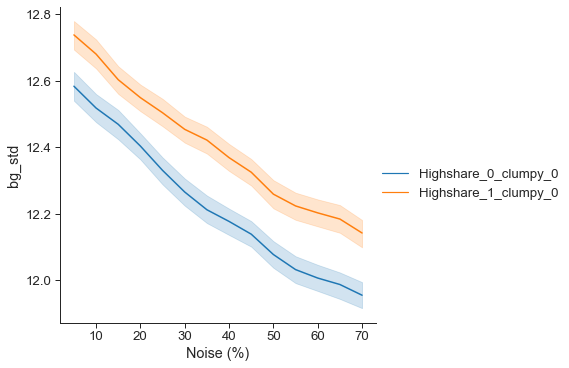

bg_std statistically same, slightly lower!!!


In [6]:

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_0_0',
#         'local_random_expanded2_1.2_0_1',
        'local_random_expanded2_1.2_1_0',
#         'local_random_expanded2_1.2_1_1',
        ]:
    
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        for noise in ress:
            if noise < 5 or noise > 70:
                continue
            res = ress[noise]
            res = res[default_synapse_pct]
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_names(model_name),
                noise=noise,
                snr=res['snr'],
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_0_0'][noise][default_synapse_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_0'][noise][default_synapse_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=12)
    
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
    #     palette=palette,
        linewidth=1.5,
    #     width=3.5, height=3.1,
        width=5.5, height=5.1,
    #     ylim=[.925, 1.05],
    #     ylim=[0, None],
        y_axis_label=metric,
        x_axis_label='Noise (%)',
    #     save_filename=f'{script_n}_norm.svg',
        show=True,
    #     custom_legend_fn=custom_legend_fn,
        )

print("low share vs high share when clumpy (01 vs 11)")
# plot('snr')
plot('snr_norm')
print("snr less")
plot('signal_size_norm')
print("signal_size less")
plot('signal_std')
print("signal_std statistically same, slightly higher")
plot('bg_std')
print("bg_std statistically same, slightly lower!!!")

low share vs high share when clumpy (01 vs 11)
Height: 5.1, Aspect: 1.0784313725490198


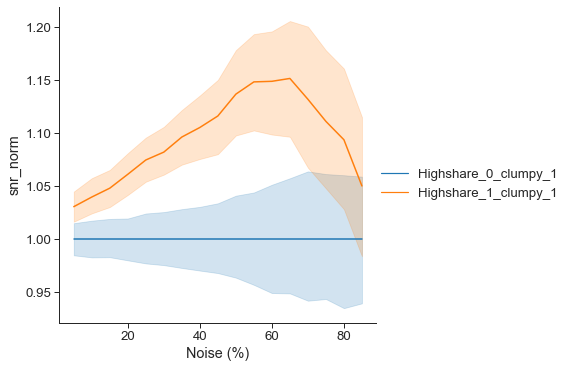

snr less
Height: 5.1, Aspect: 1.0784313725490198


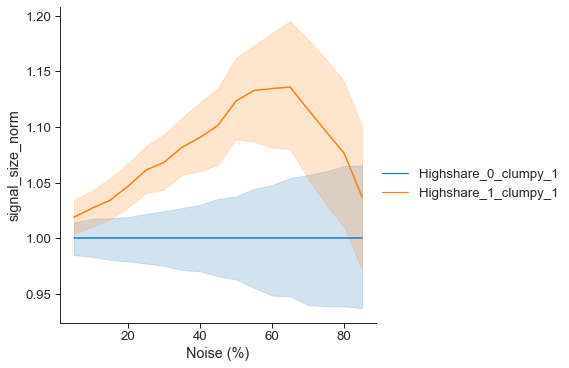

signal_size less
Height: 5.1, Aspect: 1.0784313725490198


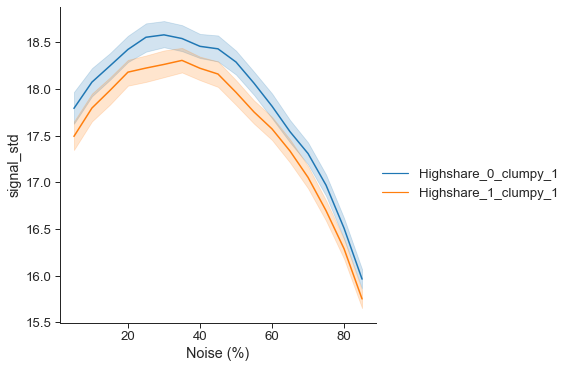

signal_std statistically same, slightly higher
Height: 5.1, Aspect: 1.0784313725490198


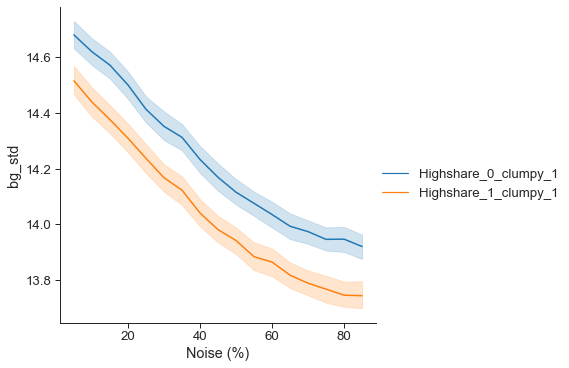

bg_std statistically same, slightly lower!!!


In [7]:
# default_synapse_pct = 17.5
default_synapse_pct = 20
# default_synapse_pct = 22.5
# default_synapse_pct = 15
# default_synapse_pct = 40
# default_synapse_pct = 7.5

mpd = MyPlotData()
for model_name in [
#         'local_random_expanded2_1.2_0_0',
        'local_random_expanded2_1.2_0_1',
#         'local_random_expanded2_1.2_1_0',
        'local_random_expanded2_1.2_1_1',
        ]:
    
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        for noise in ress:
            if noise < 5 or noise >= 90:
                continue
            res = ress[noise]
            res = res[default_synapse_pct]
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_names(model_name),
                noise=noise,
                snr=res['snr'],
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_0_1'][noise][default_synapse_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_1'][noise][default_synapse_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=12)
    
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
    #     palette=palette,
        linewidth=1.5,
    #     width=3.5, height=3.1,
        width=5.5, height=5.1,
    #     ylim=[.925, 1.05],
    #     ylim=[0, None],
        y_axis_label=metric,
        x_axis_label='Noise (%)',
    #     save_filename=f'{script_n}_norm.svg',
        show=True,
    #     custom_legend_fn=custom_legend_fn,
        )

print("low share vs high share when clumpy (01 vs 11)")
# plot('snr')
plot('snr_norm')
print("snr less")
plot('signal_size_norm')
print("signal_size less")
plot('signal_std')
print("signal_std statistically same, slightly higher")
plot('bg_std')
print("bg_std statistically same, slightly lower!!!")

Height: 3.1, Aspect: 1.129032258064516


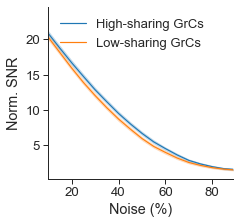

In [17]:
syn_pct = 20

def model_names_(name):
#     if '_0_1' in name:
#         return 'Low MF share'
#     if '_1_1' in name:
#         return 'High MF share'
    if '_0_1' in name:
        return 'Low-sharing GrCs'
    if '_1_1' in name:
        return 'High-sharing GrCs'

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_1_1',
        'local_random_expanded2_1.2_0_1',
        ]:
    
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        for noise in ress:
            if noise < 5 or noise >= 95:
                continue
            res = ress[noise]
            res = res[syn_pct]
            mpd.add_data_point(
                model=model_names_(model_name),
#                 model=model_names(model_name),
                noise=noise,
                snr=res['snr'],
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_1_1'][noise][syn_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper left', frameon=False, fontsize=13)

mpd0 = mpd

def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
        width=3.5, height=3.1,
        xlim=[10, 89],
#         ylim=[.89, 1.26],
        y_axis_label='Norm. SNR',
        x_axis_label='Noise (%)',
#         save_filename=f'{script_n}_fig_30_{syn_pct}.svg',
        show=True,
        custom_legend_fn=custom_legend_fn,
        )

plot('signal_size')

Height: 3.1, Aspect: 1.129032258064516


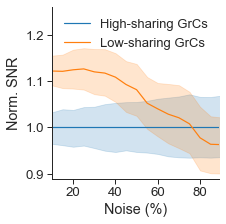

In [18]:
syn_pct = 50

def model_names_(name):
#     if '_0_1' in name:
#         return 'Low MF share'
#     if '_1_1' in name:
#         return 'High MF share'
    if '_0_1' in name:
        return 'Low-sharing GrCs'
    if '_1_1' in name:
        return 'High-sharing GrCs'

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_1_1',
        'local_random_expanded2_1.2_0_1',
        ]:
    
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        for noise in ress:
            if noise < 5 or noise >= 95:
                continue
            res = ress[noise]
            res = res[syn_pct]
            mpd.add_data_point(
                model=model_names_(model_name),
#                 model=model_names(model_name),
                noise=noise,
                snr=res['snr'],
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_1_1'][noise][syn_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper left', frameon=False, fontsize=13)
    
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
        width=3.5, height=3.1,
        xlim=[10, 89],
        ylim=[.89, 1.26],
        y_axis_label='Norm. SNR',
        x_axis_label='Noise (%)',
#         save_filename=f'{script_n}_fig_30_{syn_pct}.svg',
        show=True,
        custom_legend_fn=custom_legend_fn,
        )

mpd1 = mpd
    
plot('snr_norm')

Height: 3.1, Aspect: 1.129032258064516


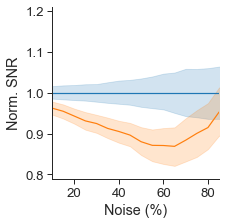

Height: 3.1, Aspect: 1.129032258064516


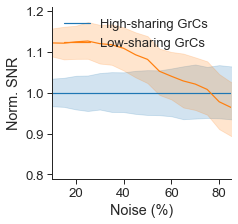

In [19]:

xlim = [10, 85]
ylim = [.79, 1.21]

def plot0(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd0,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
        width=3.5, height=3.1,
#         width=4, height=3.1,
        xlim=xlim,
        ylim=ylim,
        y_axis_label='Norm. SNR',
        x_axis_label='Noise (%)',
#         save_filename=f'{script_n}_fig_30_20.svg',
        show=True,
#         custom_legend_fn=custom_legend_fn,
        custom_legend_fn=lambda x: None,
        )

def plot1(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd1,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
        width=3.5, height=3.1,
        xlim=xlim,
        ylim=ylim,
        y_axis_label='Norm. SNR',
        x_axis_label='Noise (%)',
#         save_filename=f'{script_n}_fig_30_50.svg',
        show=True,
        custom_legend_fn=custom_legend_fn,
        )

plot0('snr_norm')
plot1('snr_norm')

Height: 3.1, Aspect: 1.2903225806451613


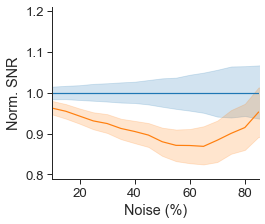

Height: 3.1, Aspect: 1.2903225806451613


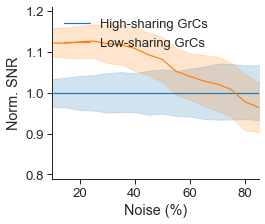

In [20]:

xlim = [10, 85]
ylim = [.79, 1.21]

def plot0(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd0,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
#         width=3.5, height=3.1,
        width=4, height=3.1,
        xlim=xlim,
        ylim=ylim,
        y_axis_label='Norm. SNR',
        x_axis_label='Noise (%)',
#         save_filename=f'{script_n}_fig_30_20_.svg',
        show=True,
#         custom_legend_fn=custom_legend_fn,
        custom_legend_fn=lambda x: None,
        )

def plot1(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd1,
        x='noise',
        y=metric,
        hue='model',
        context='paper',
#         width=3.5, height=3.1,
        width=4, height=3.1,
        xlim=xlim,
        ylim=ylim,
        y_axis_label='Norm. SNR',
        x_axis_label='Noise (%)',
#         save_filename=f'{script_n}_fig_30_50_.svg',
        show=True,
        custom_legend_fn=custom_legend_fn,
#         custom_legend_fn=lambda x: None,
        )

plot0('snr_norm')
plot1('snr_norm')

Height: 3.1, Aspect: 1.129032258064516


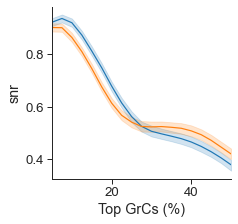

Height: 3.1, Aspect: 1.129032258064516


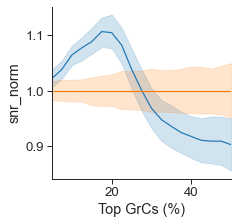

Height: 3.1, Aspect: 1.129032258064516


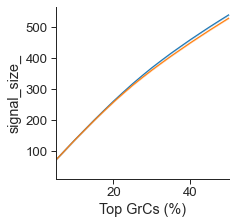

Height: 3.1, Aspect: 1.129032258064516


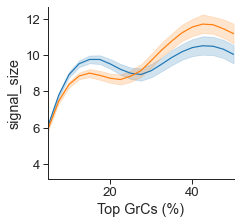

Height: 3.1, Aspect: 1.129032258064516


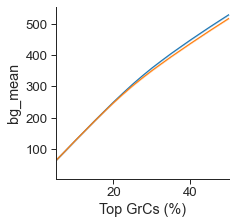

Height: 3.1, Aspect: 1.129032258064516


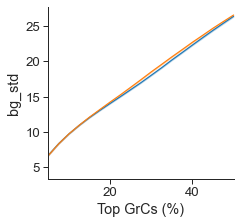

In [36]:
noise = 40

def model_names_(name):
    if '_0_1' in name:
        return 'Low-sharing GrCs'
    if '_1_1' in name:
        return 'High-sharing GrCs'

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_1_1',
        'local_random_expanded2_1.2_0_1',
        ]:
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            bg_mean=res['bg_mean']
            mpd.add_data_point(
                model=model_names_(model_name),
                syn_pct=syn_pct,
                snr=res['snr'],
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_=res['signal_size']+bg_mean,
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=13)
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='syn_pct',
        y=metric,
        hue='model',
        context='paper',
        width=3.5, height=3.1,
#         width=5.5, height=5.1,
        xlim=[5, 50],
#         ylim=ylim,
#         y_axis_label='Norm. SNR',
        y_axis_label=metric,
        x_axis_label='Top GrCs (%)',
#         save_filename=f'{script_n}_fig_high_grcs_30_{noise}.svg',
        show=True,
        custom_legend_fn=lambda x: None,
        )
plot('snr')
plot('snr_norm')
plot('signal_size_')
plot('signal_size')
plot('bg_mean')
plot('bg_std')

Height: 3.1, Aspect: 1.1612903225806452
/n/groups/htem4/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/plot_220725_snr_synapse_fig_high_grcs_30_40_snr.svg


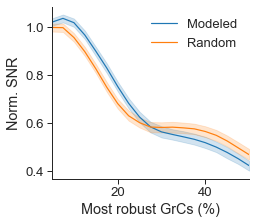

In [14]:
noise = 40

def model_names_(name):
    if '_0_1' in name:
        return 'Random'
    if '_1_1' in name:
        return 'Modeled'

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_1_1',
        'local_random_expanded2_1.2_0_1',
        ]:
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            mpd.add_data_point(
                model=model_names_(model_name),
                syn_pct=syn_pct,
                snr=res['snr'],
                snr_=res['snr']/.9,
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=13)
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='syn_pct',
        y=metric,
        hue='model',
        context='paper',
        width=3.6, height=3.1,
#         width=5.5, height=5.1,
        xlim=[5, 50],
#         ylim=ylim,
        y_axis_label='Normalized SNR',
        x_axis_label='Most Reliable GrCs (%)',
        save_filename=f'{script_n}_fig_high_grcs_30_{noise}_snr.svg',
        show=True,
#         custom_legend_fn=lambda x: None,
        custom_legend_fn=custom_legend_fn,
        )
plot('snr_')
# plot('snr_norm')

Height: 3.1, Aspect: 1.2903225806451613
/n/groups/htem4/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/plot_220725_snr_synapse_fig_high_grcs_30_40_snr_wider.svg


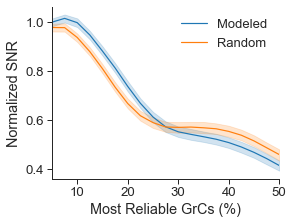

In [15]:
noise = 40

def model_names_(name):
    if '_0_1' in name:
        return 'Random'
    if '_1_1' in name:
        return 'Modeled'

mpd = MyPlotData()
for model_name in [
        'local_random_expanded2_1.2_1_1',
        'local_random_expanded2_1.2_0_1',
        ]:
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            mpd.add_data_point(
                model=model_names_(model_name),
                syn_pct=syn_pct,
                snr=res['snr'],
                snr_=res['snr']/.92,
                snr_norm=res['snr']/averages['snr']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                bg_mean=res['bg_mean'],
                bg_std=res['bg_std'],
                signal_size=res['signal_size'],
                signal_size_norm=res['signal_size']/averages['signal_size']['local_random_expanded2_1.2_0_1'][noise][syn_pct],
                signal_std=res['signal_std'],
                )
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=13)
def plot(metric):
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='syn_pct',
        y=metric,
        hue='model',
        context='paper',
#         width=3.6, height=3.1,
        width=4, height=3.1,
#         width=5.5, height=5.1,
        xlim=[5, 50],
#         ylim=ylim,
        y_axis_label='Normalized SNR',
        x_axis_label='Most Reliable GrCs (%)',
#         save_filename=f'{script_n}_fig_high_grcs_30_{noise}_snr_wider.svg',
        show=True,
#         custom_legend_fn=lambda x: None,
        custom_legend_fn=custom_legend_fn,
        )
plot('snr_')
# plot('snr_norm')

In [60]:
import pandas as pd
data = defaultdict(list)
model0 = 'local_random_expanded2_1.2_1_1'
model1 = 'local_random_expanded2_1.2_0_1'

resss = db[model0]
ress_tries = resss  # get the first element in tuple
for n_try, ress in enumerate(ress_tries):
    ress = ress[0]
    for noise in ress:
        if noise <= 5 or noise >= 95:
            continue
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            snr_norm = res['snr']/averages['snr'][model1][noise][syn_pct]
#             data.append([noise, snr_norm, syn_pct])
            data[(noise, syn_pct)].append(snr_norm)

data_ = []
for (noise, syn_pct), l in data.items():
    snr_norm_avg = sum(l)/len(l)
    noise_ = int(noise*100)/100
    syn_pct_ = int(syn_pct*100)/100
    data_.append([noise_, snr_norm_avg, syn_pct_])
    
df = pd.DataFrame(data_, columns = ['Noise', 'Norm. SNR', 'GrC'])
# df = df.pivot('GrC %', 'Noise')
df = df.pivot('Noise', 'GrC')
# sns.heatmap(sim_matrix,
#             center=center,
# #             xticklabels=valid_pcs_clustered_list2, yticklabels=valid_pcs_clustered_list2,
#             vmax=.21,
# #             vmax=1,
#             vmin=-.21,
#             square=True,
#             mask=mask,
# #             cmap=cmap,
#            )
import matplotlib.pyplot as plt
# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(df,
# #             annot=True,
# #             fmt="d",
# #             linewidths=.5,
#             square=True,
#             center=1.0,
# #             xticklabels=[],
# #             ax=ax,
#            )



/n/groups/htem4/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/plot_220725_snr_synapse_fig_heatmap.svg


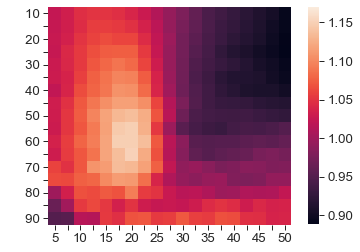

In [9]:
import pandas as pd
data = defaultdict(list)
model0 = 'local_random_expanded2_1.2_1_1'
model1 = 'local_random_expanded2_1.2_0_1'

resss = db[model0]
ress_tries = resss  # get the first element in tuple
for n_try, ress in enumerate(ress_tries):
    ress = ress[0]
    for noise in ress:
        if noise <= 5 or noise >= 95:
            continue
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            if syn_pct < 5:
                continue
            snr_norm = res['snr']/averages['snr'][model1][noise][syn_pct]
#             data.append([noise, snr_norm, syn_pct])
            data[(noise, syn_pct)].append(snr_norm)

mat = defaultdict(lambda: defaultdict(float))
data_ = []
for (noise, syn_pct), l in data.items():
    snr_norm_avg = sum(l)/len(l)
    noise_ = int(noise*100)/100
    syn_pct_ = int(syn_pct*100)/100
    data_.append([noise_, snr_norm_avg, syn_pct_])
    mat[noise_][syn_pct_] = snr_norm_avg

mat_ = []
for noise in sorted(list(mat.keys())):
    m = []
    for pct in sorted(list(mat[noise].keys())):
        m.append(mat[noise][pct])
    mat_.append(m)

import matplotlib.pyplot as plt
# f, ax = plt.subplots(figsize=(9, 6))
f, ax = plt.subplots(figsize=(6,4))

pct_labels = sorted(list(mat[noise].keys()))
for i in range(len(pct_labels)):
    pct_labels[i] = int(pct_labels[i])
    if i % 2 == 1:
        pct_labels[i] = ''

noise_labels = sorted(list(mat.keys()))
for i in range(len(noise_labels)):
    noise_labels[i] = '     ' + str(int(noise_labels[i]))
#     noise_labels[i] = str(int(noise_labels[i]))
    if i % 2 == 1:
        noise_labels[i] = ''

sns.heatmap(mat_,
#             annot=True,
#             fmt="d",
#             linewidths=.5,
            square=True,
#             center=1.0,
            vmax=1.17,
            xticklabels=pct_labels,
            yticklabels=noise_labels,
#             ax=ax,
           )
ax.ylabel = 'Noise'
fout = f'{script_n}_fig_heatmap.svg'
print(os.path.abspath(fout))
# plt.savefig(fout, bbox_inches='tight', transparent=True)

/n/groups/htem4/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/plot_220725_snr_synapse_fig_heatmap_blue.svg


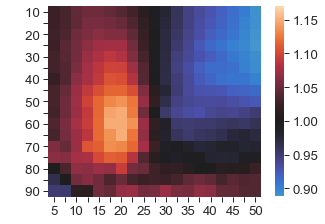

In [13]:
import pandas as pd
data = defaultdict(list)
model0 = 'local_random_expanded2_1.2_1_1'
model1 = 'local_random_expanded2_1.2_0_1'

resss = db[model0]
ress_tries = resss  # get the first element in tuple
for n_try, ress in enumerate(ress_tries):
    ress = ress[0]
    for noise in ress:
        if noise <= 5 or noise >= 95:
            continue
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            if syn_pct < 5:
                continue
            snr_norm = res['snr']/averages['snr'][model1][noise][syn_pct]
#             data.append([noise, snr_norm, syn_pct])
            data[(noise, syn_pct)].append(snr_norm)

mat = defaultdict(lambda: defaultdict(float))
data_ = []
for (noise, syn_pct), l in data.items():
    snr_norm_avg = sum(l)/len(l)
    noise_ = int(noise*100)/100
    syn_pct_ = int(syn_pct*100)/100
    data_.append([noise_, snr_norm_avg, syn_pct_])
    mat[noise_][syn_pct_] = snr_norm_avg

mat_ = []
for noise in sorted(list(mat.keys())):
    m = []
    for pct in sorted(list(mat[noise].keys())):
        m.append(mat[noise][pct])
    mat_.append(m)


pct_labels = sorted(list(mat[noise].keys()))
for i in range(len(pct_labels)):
    pct_labels[i] = int(pct_labels[i])
    if i % 2 == 1:
        pct_labels[i] = ''

noise_labels = sorted(list(mat.keys()))
for i in range(len(noise_labels)):
    noise_labels[i] = '     ' + str(int(noise_labels[i]))
#     noise_labels[i] = str(int(noise_labels[i]))
    if i % 2 == 1:
        noise_labels[i] = ''

import matplotlib.pyplot as plt
# f, ax = plt.subplots(figsize=(9, 6))
# f, ax = plt.subplots(figsize=(6,4))
f, ax = plt.subplots(figsize=(5,3.5))

sns.heatmap(mat_,
#             annot=True,
#             fmt="d",
#             linewidths=.5,
            square=True,
            center=1.0,
            vmax=1.17,
            xticklabels=pct_labels,
            yticklabels=noise_labels,
#             ax=ax,
           )
ax.ylabel = 'Noise'
fout = f'{script_n}_fig_heatmap_blue.svg'
print(os.path.abspath(fout))
plt.savefig(fout, bbox_inches='tight', transparent=True)

/n/groups/htem4/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/plot_220725_snr_synapse_fig_heatmap_transposed.svg


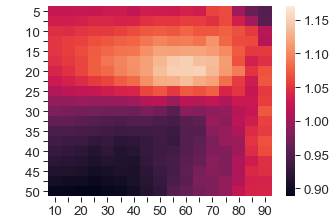

In [12]:
import pandas as pd
data = defaultdict(list)
model0 = 'local_random_expanded2_1.2_1_1'
model1 = 'local_random_expanded2_1.2_0_1'

resss = db[model0]
ress_tries = resss  # get the first element in tuple
for n_try, ress in enumerate(ress_tries):
    ress = ress[0]
    for noise in ress:
        if noise <= 5 or noise >= 95:
            continue
        res_ = ress[noise]
        for syn_pct, res in res_.items():
            if syn_pct < 5:
                continue
            snr_norm = res['snr']/averages['snr'][model1][noise][syn_pct]
#             data.append([noise, snr_norm, syn_pct])
            data[(noise, syn_pct)].append(snr_norm)

mat = defaultdict(lambda: defaultdict(float))
data_ = []
for (noise, syn_pct), l in data.items():
    snr_norm_avg = sum(l)/len(l)
    noise_ = int(noise*100)/100
    syn_pct_ = int(syn_pct*100)/100
    data_.append([noise_, snr_norm_avg, syn_pct_])
    mat[noise_][syn_pct_] = snr_norm_avg

mat_ = []
for pct in sorted(list(mat[noise].keys())):
    m = []
    for noise in sorted(list(mat.keys())):
        m.append(mat[noise][pct])
    mat_.append(m)

import matplotlib.pyplot as plt

pct_labels = sorted(list(mat[noise].keys()))
for i in range(len(pct_labels)):
    pct_labels[i] = '     ' + str(int(pct_labels[i]))
    if i % 2 == 1:
        pct_labels[i] = ''

noise_labels = sorted(list(mat.keys()))
for i in range(len(noise_labels)):
    noise_labels[i] = str(int(noise_labels[i]))
#     noise_labels[i] = str(int(noise_labels[i]))
    if i % 2 == 1:
        noise_labels[i] = ''

# f, ax = plt.subplots(figsize=(9, 6))
# f, ax = plt.subplots(figsize=(6,4))
f, ax = plt.subplots(figsize=(5,3.5))
sns.heatmap(mat_,
#             annot=True,
#             fmt="d",
#             linewidths=.5,
#             square=True,
#             center=1.0,
            vmax=1.17,
            xticklabels=noise_labels,
            yticklabels=pct_labels,
#             ax=ax,
           )
ax.ylabel = 'Noise'
fout = f'{script_n}_fig_heatmap_transposed.svg'
print(os.path.abspath(fout))
# plt.savefig(fout, bbox_inches='tight', transparent=True)